# Проект: Принятие решений в бизнесе
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

__Цель проекта:__  
Данный тренировочный проект направлен на закрепление навыков приоритизации гипотез с помощью фрейморков ICE и RICE, а также навыков анализа результатов A/B тестов. 

__Ход работы:__  
___В первой части___ проекта мы применим фреймфорки ICE и RICE  к датасету с гипотезами и их параметрами, и сравним результаты.  
___Во второй части___ проекта мы:
1. Построим графики:
    - кумулятивной выручки
    - кумулятивного среднего чека и его относительного изменения
    - кумулятивного среднего количества заказов на посетителя и его относительного изменения
    - количества заказов и стоимости заказов
2. Расчитаем перцентили для количества заказов и стоимости заказов для нахождения верхних границ
3. Расчитаны статистические значимости в среднем количестве заказов на посетителя и в среднем чеке по группам как по сырым данным, так и по очищенным
4. И сделаем на основе возникших фактов выводы об остановке (в связи с победой какой то из групп или бессмысленностью продолжения) или продолжении теста

## Исходные данные

In [1]:
# Подключаем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import datetime as dt

In [2]:
# Подключаем исходные датафреймы
try:
    hyp = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except:
    hyp = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')    

In [3]:
# выведем общую информацию
display(hyp.info())
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

пустых строк не обнаружено!

## Первая часть: Приоритизация гипотез

### Фреймворк ICE

In [4]:
# добавим к датасету hyp стобец ice с результатами метода ICE
hyp['ICE'] = (hyp['Impact']*hyp['Confidence'])/hyp['Efforts']
hyp[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


### Фреймворк RICE

In [5]:
pd.options.display.max_colwidth = 1
# добавим к датасету hyp стобец RICE с результатами метода RICE
hyp['RICE'] = (hyp['Reach'] * hyp['Impact'] * hyp['Confidence'])/hyp['Efforts']
hyp[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Сравнение результатов

При применении методов RICE и ICE в топе 5 оказываются один и тот же набор гипотез, но внутри этого топа распределение довольно сильно разнится.  
В отличии от метода ICE, при котором лидирующей гипотезой становится скидка на день рождения, метод RICE выдвигает в качестве лидера добавление формы подписки на все основные страницы. Такая разница обусловлена параметром reach, который прямо пропорционален доли от общего числа пользователей,которую затронут изменения.  
Очевидно, что скидка на день рождения будет касаться далеко не всех, а добавление формы подписки затронет большинство.

## Вторая часть: Анализ A/B-теста

### Предобработка данных

In [6]:
# выведем общую информацию о датафреймах
print(orders.info())
print(visitors.info())
# изменим тип date с object на datetime
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [7]:
# проверим
print(orders.info())
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


In [8]:
display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
# Проверка на дубликаты
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


Пустых строк и дубликатов не обнаружено!  
Изменили тип date с object на datetime

### Проверка уникальности пользователей внутри различных групп

In [10]:
# Создадим списки пользователей по группам
orA_list = list(orders[orders['group']=='A']['visitorId'].unique())
orB_list = list(orders[orders['group']=='B']['visitorId'].unique())
# Проверим перечение пользователей между группами
per = list(set(orA_list) & set(orB_list))
print(len(per),len(orA_list)+len(orB_list))

58 1089


целых 58 пользователей были включены в обе группы, для корректности анализа необходимо их исключить из датафрейма

In [11]:
# удаляем пересекающихся пользователей
orders = orders.query('visitorId not in @per')
print('Датафрейм orders уменьшился на', round((len(orA_list)+len(orB_list) - len(orders))*100/ \
      (len(orA_list)+len(orB_list)),1), '%')

Датафрейм orders уменьшился на 6.7 %


### Построение кумулятивной выручки по группам

In [12]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


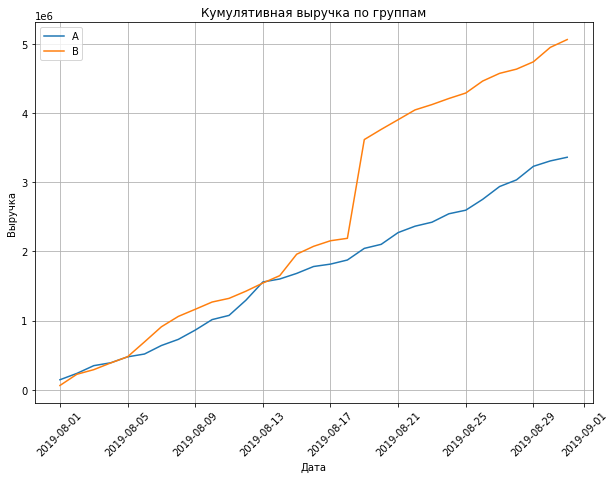

In [13]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Общие настройки графика
plt.figure(figsize=(10,7))
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по группам')
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();

Графики обеих групп только растут, при этом подозрение вызывает резкий рост выручки в группе В 18 августа. Это или большое количество заказов в день или несколько(или один) крупных.

### Построение графика кумулятивного среднего чека по группам

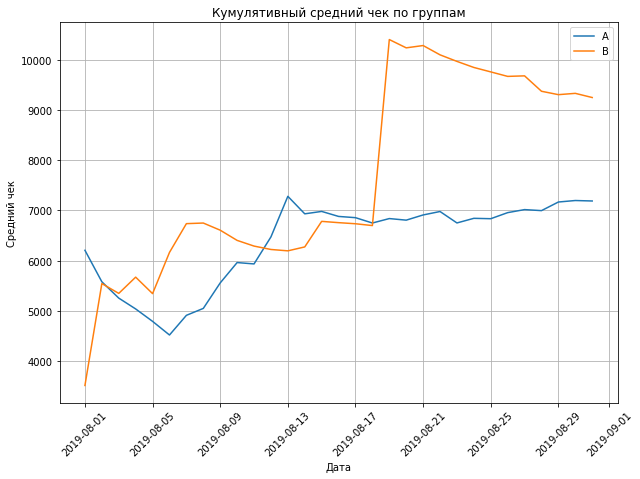

In [14]:
plt.figure(figsize=(10,7))
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек по группам')

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

Изначально, как и на графике выручки, средний чек двух групп не так сильно и отличался и изменял свои значения довольно плавно. Но в группе В 18 августа произошел довольно крупный заказ, из-за которого средний чек вырос почти на 50%.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

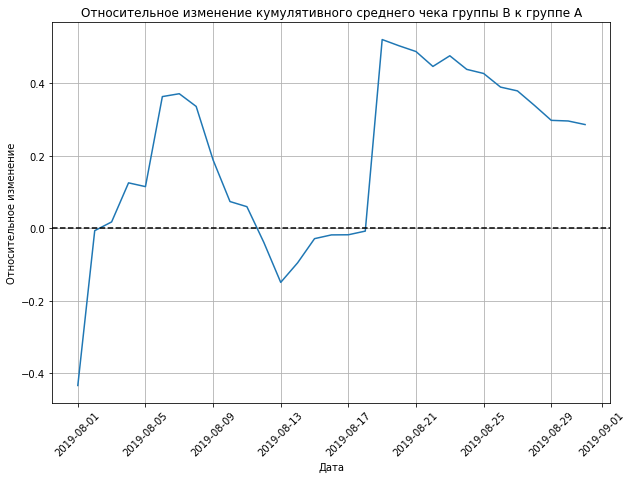

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', \
                                                   suffixes=['A', 'B'])

plt.figure(figsize=(10,7))
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

График довольно сильно скачет, среди данных наверняка есть выбросы и крупные заказы

### Построение графика кумулятивного среднего количества заказов на посетителя по группам

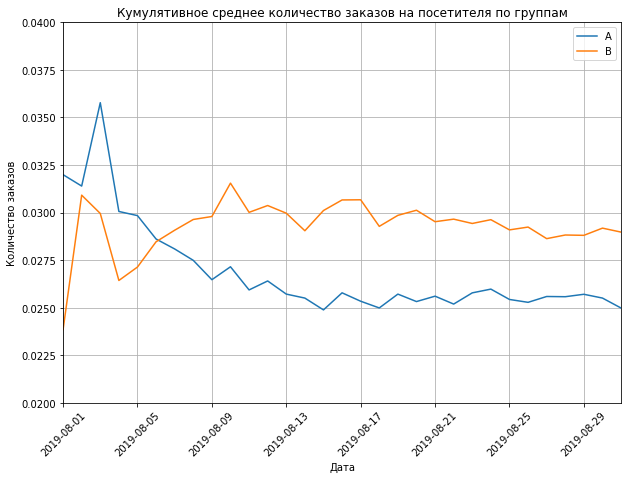

In [16]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
# cumulativeDataA['date'] = cumulativeDataA.ActivityHour.dt.date

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# cumulativeDataB['date'] = cumulativeDataB.ActivityHour.dt.date


plt.figure(figsize=(10,7))
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
x_min,x_max = dt.datetime.strptime('2019-08-01', '%Y-%m-%d'),dt.datetime.strptime('2019-08-31', '%Y-%m-%d')

plt.axis([x_min, x_max, 0.02, 0.04]);

При довольно похожем старте и падении количество заказов на посетителя в группе В выросло и зафискировалось. Значение в группе А также зафискировались, но на меньших значениях.

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

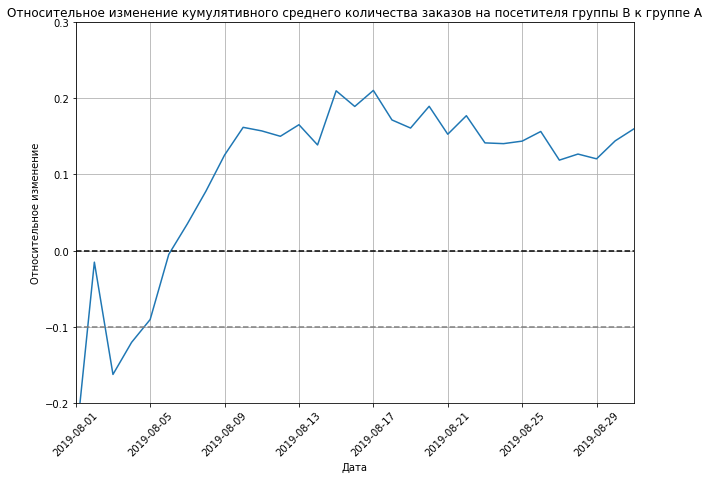

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,7))
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
# plt.legend();

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([x_min, x_max, -0.2, 0.3]);

 В первые несколько дней группа В незначительно уступала группе А, но потом начала доминировать, что и продолжается до конца периода.

### Построение точечного графика количества заказов по пользователям

In [18]:
# подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

         userId  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


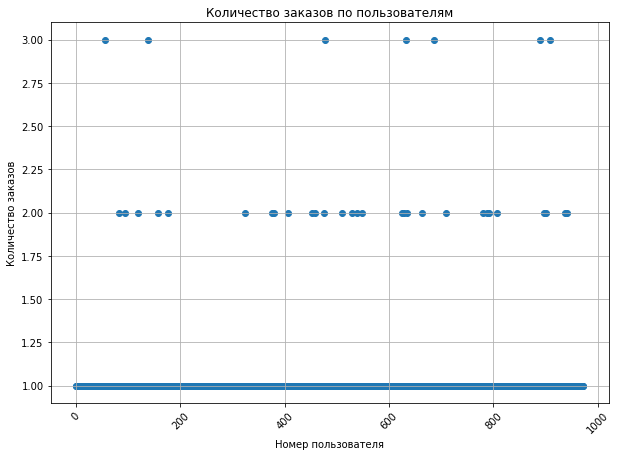

In [19]:
# Построим точечную диаграмму
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10,7))
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('Номер пользователя')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по пользователям')

plt.scatter(x_values, ordersByUsers['orders']);

Многие пользователи делают/сделали 1-2 заказов. Все что выше этих значений - кандидаты на аномалии.

### Расчет 95-й и 99-й перцентилей количества заказов на пользователя

In [20]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Не более 5% пользователей оформляли более 1-го заказа и не более 1% пользователей оформляли более 2-ух. Примем за верхнюю границу значение в 2 заказа.

### Построение точечного графика стоимостей заказов

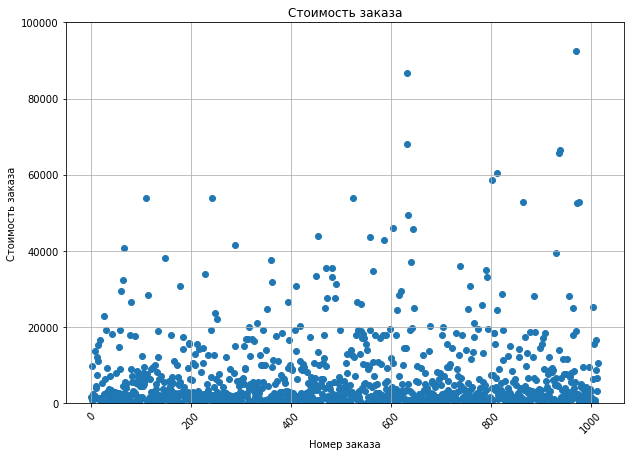

In [21]:
x_values = pd.Series(range(0,len(orders)))

plt.figure(figsize=(10,7))
plt.ylim([0, 100000])
plt.grid()
plt.xticks(rotation=45)
plt.xlabel('Номер заказа')
plt.ylabel('Стоимость заказа')
plt.title('Стоимость заказа')

plt.scatter(x_values, orders['revenue']);

Стоимости большинства заказов лежат в диапазоне от 0 до 10000, все что выше - аномалии.

### Расчет 95-й и 99-й перцентилей стоимости заказов

In [22]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не более 5% стоимостей заказов более 26785, и не более 1% стомостей заказов более 53904  
Примем за верхнюю границу значение в 50000

### Расчет статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Уровень статистической зависимости $\alpha$ = 0.05

Используемый статистический критерий для проверки гипотез - U-критерий Манна-Уитни, так как имеем дело с выбросами в данных

Формулировка гипотезы  
H0 - различий в среднем числе заказов групп A и B нет  
H1 - различия в среднем числе заказов групп A и B есть

In [23]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                max(cumulativeDataA['visitors']) - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                max(cumulativeDataB['visitors']) - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value = ',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-value =  0.011
0.160


так p-value = 0.011 < 0.05, то гипотеза о том, что различий в среднем числе заказов нет, маловероятна  
Относительный выигрыш группы В = 16%

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Формулировка гипотезы  
H0 - различий в среднем чеке групп A и B нет  
H1 - различия в среднем чеке групп A и B есть

In [24]:
print('p-value = ','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value =  0.829
0.287


так p-value = 0.829 > 0.05, то нет причин отвергать гипотезу об отсутствии различий в средних чеках групп    
Относительный выигрыш группы В = 28,7%

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [25]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295 
1137    759473111 
949     887908475 
744     888512513 
1103    1164614297
Name: visitorId, dtype: int64
15


Всего 15 аномальных пользователей

In [26]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                max(cumulativeDataA['visitors']) - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                max(cumulativeDataB['visitors']) - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [27]:
print('p-value = ','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value =  0.008
0.172


p-value на чистых данных даже стал немного меньше, и все еще находится на уровне ниже 0.05  
Выйгрыш группы В вырос на 1,2% и теперь равен 17,2%

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [28]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.950
0.009


p-value как и был высоким, так и остался, нулевую гипотезу не отвергаем  
Преймущество группы В по сравнению с группой А существенно сократилось и остановилось на отметке в 0,9%

### Выводы по тесту

 - Есть статистически значимое различие по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий
 - Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий
 - График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и есть тенденции к улучшению
 - График различия среднего чека говорит о том, что результаты группы B ухудшаются в последнее время, но глобально они уже половину периода наблюдения стабильно выше группы А

Принимания во внимания все вышеперечисленные факты, можно сделать вывод __о прекращении теста и победе группы В__

## Выводы

В результате данного проекта поставленные цели были выполнены в полном объеме  

__Первая часть проекта:__  
 - К набору гипотез были применены фреймворки ICE и RICE
 - На основе их значений были построены топы гипотез
 - Были объяснены различия в составлении топов для данных фреймворков
***
В результате самой высокооцененой гипотезой методом RICE является добавления нвоого окна подписки на все основные страницы
****

__Вторая часть проекта:__  
- Были построенны графики:
   - кумулятивной выручки
   - кумулятивного среднего чека и его относительного изменения
   - кумулятивного среднего количества заказов на посетителя и его относительного изменения
   - количества заказов и стоимости заказов
- Расчитаны перцентили для количества заказов и стоимости заказов для нахождения верхних границ
- Расчитаны статистические значимости в среднем количестве заказов на посетителя и в среднем чеке по группам как по сырым данным, так и по очищенным

***
В результате:
- Есть статистически значимое различие по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий
- График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и есть тенденции к улучшению
- График различия среднего чека говорит о том, что результаты группы B ухудшаются в последнее время, но глобально они уже половину периода наблюдения стабильно выше группы А
  
Принимания во внимания все вышеперечисленные факты, можно сделать вывод о __прекращении теста__ и __победе группы В__